# Exploratory Data Analysis and Preprocessing
## Intelligent Complaint Analysis for Financial Services

This notebook explores and preprocesses CFPB complaint data
to prepare it for a Retrieval-Augmented Generation (RAG) system.


We begin by importing required libraries and custom utility functions.


In [ ]:
import sys
sys.path.append("../src")

import matplotlib.pyplot as plt
import seaborn as sns

from dataUtilities import (
    load_data,
    filter_products_and_narratives,
    compute_narrative_length,
    apply_text_cleaning,
    save_dataframe
)

## Loading the CFPB Complaint Dataset

The raw dataset contains complaints across many financial products.
We load it to understand its structure and content.

In [4]:
df = load_data("../data/raw/complaints.csv")
df.head()


/home/keri/Desktop/my/tenx/week8/rag-complaint-chatbot/notebooks/../src/dataUtilities.py:9: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


## Complaint Distribution by Product

Understanding complaint volume per product helps us
identify dominant categories and informs stratified sampling later.


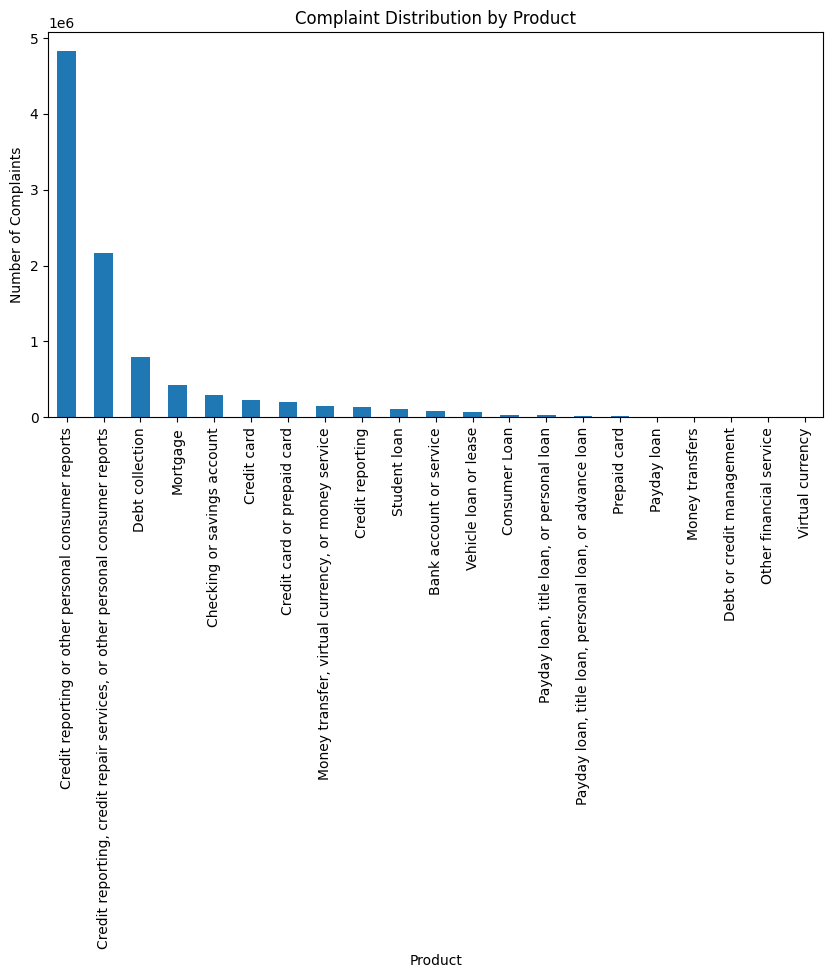

In [5]:
plt.figure(figsize=(10,5))
df["Product"].value_counts().plot(kind="bar")
plt.title("Complaint Distribution by Product")
plt.ylabel("Number of Complaints")
plt.show()


## Complaint Narrative Length Analysis

Narrative length varies widely. This impacts chunking strategy
used in embedding and vector search.


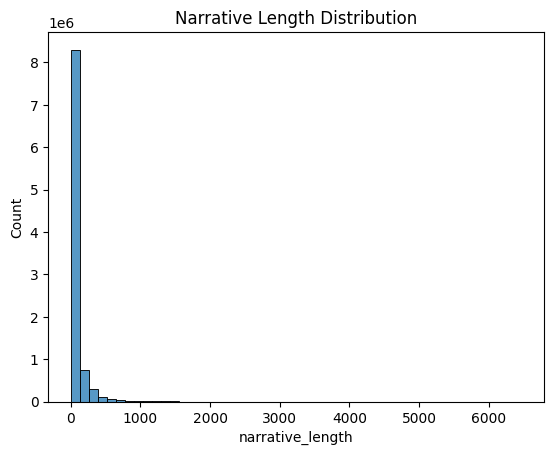

In [6]:
df = compute_narrative_length(df, "Consumer complaint narrative")

sns.histplot(df["narrative_length"], bins=50)
plt.title("Narrative Length Distribution")
plt.show()


## Filtering Relevant Complaints

We retain only target financial products and remove
complaints without narrative text.


In [7]:
valid_products = [
    "Credit card",
    "Personal loan",
    "Savings account",
    "Money transfer"
]

filtered_df = filter_products_and_narratives(df, valid_products)
filtered_df["Product"].value_counts()


Product
Credit card    80667
Name: count, dtype: int64

## Text Cleaning

Complaint narratives are cleaned to improve embedding quality.
This includes lowercasing, removing boilerplate phrases,
and eliminating special characters.


In [8]:
filtered_df = apply_text_cleaning(
    filtered_df,
    text_column="Consumer complaint narrative"
)

filtered_df[["Product", "cleaned_narrative"]].head()


,Product,cleaned_narrative
12237,Credit card,a xxxx xxxx card was opened under my name by a...
13280,Credit card,dear cfpb i have a secured credit card with ci...
13506,Credit card,i have a citi rewards cards the credit balance...
13955,Credit card,bi am writing to dispute the following charges...
14249,Credit card,although the account had been deemed closed i ...


## Saving the Cleaned Dataset

The cleaned dataset will be used for embedding and vector indexing.


In [9]:
save_dataframe(
    filtered_df,
    "../data/processed/filtered_complaints.csv"
)
